# Лабораторная работа №3

Корзун В. А. Вариант 3 07.04.2024

## Анимированное построение линии на плоскости

a) $\color{Red}{Создание}$ $\color{Red}{анимации}$ построения графика некторой явно заданной аналитической функции $y=y(x)$ по значениям $x$, последовательно изменяющимся от $x_{min}$ до $x_{max}$ с шагом $step$. Выполнение задания для $y(x) = (x - 5)^3$, $x_{min} = 0$, $x_{max} = 10$, $step = 0.1$.

b) $\color{Red}{Создание}$ $\color{Red}{анимации}$ построения графика параметрически заданной функции $x = x(t)$, $y = y(t)$ по значениям $t$, последовательно изменяющимся от $t_{min}$ до $t_{max}$ с шагом $step$. Выполнение задания для функции $x = arcsin (sit(t))$, $y = arccos(cos(t))$, где $t_{min} = 0$, $t_{max} = 10$, $step = 0.1$.

### А - явно заданная ф-ция

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from matplotlib.animation import FuncAnimation

In [5]:
%matplotlib widget

Будем строить анимацию для функции вида $y(x) = (x - 5)^3$ по значениям $x$, изменяющимся от $x_{min} = 0$ до $x_{max} = 10$ с шагом $step = 0.1$

In [11]:
def y(x):
    return (x-5)**3
# или так
y = lambda x: (x-5)**3
dy = lambda x: 3*(x-5)**2

In [12]:
x_min = 0; x_max = 10; step = 0.1

Создадим массив x_array равномерно распределённых чисел на отрезке $[x_{min}, x_{max}]$ с шагом $step$ с помощью фунkции arange и также соответствующие y. 

In [13]:
x_array = np.arange(x_min, x_max, step)
y_array = y(x_array)

Из двух массивов x_array и y_array создадим матрицу matrix координат точек графика функции $y(x)$. Матрица состоит из двух столбцов. Первый столбец матрицы содержит $x$-координаты точек, второй столбец -- $y$ -координаты точек

In [14]:
matrix = np.transpose([x_array, y_array])

С помощью функции figure из модуля pyplot создадим графическое окно fig1, в котором в дальнейшем будет отображаться анимация

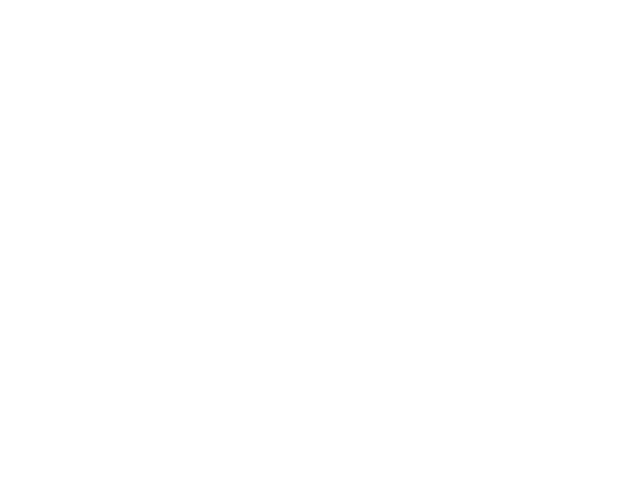

In [9]:
fig1 = plt.figure()

C помощью функции axes из модуля pyplot cоздадим графическую область ax1 и зададим для нее пределы по осям

In [10]:
y_min, y_max = np.min(y_array), np.max(y_array)

ax1 = plt.axes()
plt.axis([x_min - 1, x_max + 1, y_min - 1, y_max + 1])

(-1.0, 11.0, -126.0, 118.64900000000003)

С помощью функции plot из пакета pyplot создадим в графической области ax1
графический объект типа Line2D синего цвета, координаты которого пока не
определены

In [11]:
line1, = ax1.plot([],[],'b')
print(type(line1))
line1.get_xdata(), line1.get_ydata()

<class 'matplotlib.lines.Line2D'>


(array([], dtype=float64), array([], dtype=float64))

In [12]:
? line1.get_xdata

Signature:  line1.get_xdata(orig=True)
Docstring:
Return the xdata.

If *orig* is *True*, return the original data, else the
processed data.
File:      f:\apps\anaconda\lib\site-packages\matplotlib\lines.py
Type:      method

Определим пользовательскую функцию одного аргумента at_frame1 , которая будет
вызываться в каждом кадре анимации

Единственный аргумент функции at_frame1 является массивом из $x$ и $y$ координат точки графика функции. Функция at_frame1 добавляет к графическому объектy line1 точку с координатами $(x, y)$


In [13]:
def at_frame1(point):
    """добавляет к объекту line1 точку с координатами (point[0],point[1])
    
    Arguments :
    
    point : массив из двух элементов
    
    Returns : None
    """
    x_coord = list(line1.get_xdata())
    y_coord = list(line1.get_ydata())

    x_coord.append(point[0])
    y_coord.append(point[1])

    line1.set_data(x_coord, y_coord)

In [14]:
? line1.set_data

Signature:  line1.set_data(*args)
Docstring:
Set the x and y data.

Parameters
----------
*args : (2, N) array or two 1D arrays
File:      f:\apps\anaconda\lib\site-packages\matplotlib\lines.py
Type:      method

In [15]:
help(at_frame1)

Help on function at_frame1 in module __main__:

at_frame1(point)
    добавляет к объекту line1 точку с координатами (point[0],point[1])
    
    Arguments :
    
    point : массив из двух элементов
    
    Returns : None



In [16]:
? at_frame1

Signature:  at_frame1(point)
Docstring:
добавляет к объекту line1 точку с координатами (point[0],point[1])

Arguments :

point : массив из двух элементов

Returns : None
File:      c:\users\huawei\appdata\local\temp\ipykernel_18980\3591046323.py
Type:      function

In [17]:
print(at_frame1.__doc__)

добавляет к объекту line1 точку с координатами (point[0],point[1])
    
    Arguments :
    
    point : массив из двух элементов
    
    Returns : None
    


Для построения анимации полагаем аргумент frames для функции FuncAnimation следующим образом: frames=matrix . Это означает, что количество кадров анимации будет совпадать с количеством строк матрицы matrix . При этом для каждого кадра анимации будет вызываться функция at_frame1 со значением аргумента, равным массиву со значениями строки матрицы matrix , соответствующей номеру кадра

$\color{Red}{Важная}$ $\color{Red}{информация}$ $\color{Red}{для}$ $\color{Red}{построения}$ $\color{Red}{анимации:}$ вызов функций figure , axes ,
plot , необходимых для анимации, а также вызов функции FuncAnimation должны
располагаться в одной ячейке кода

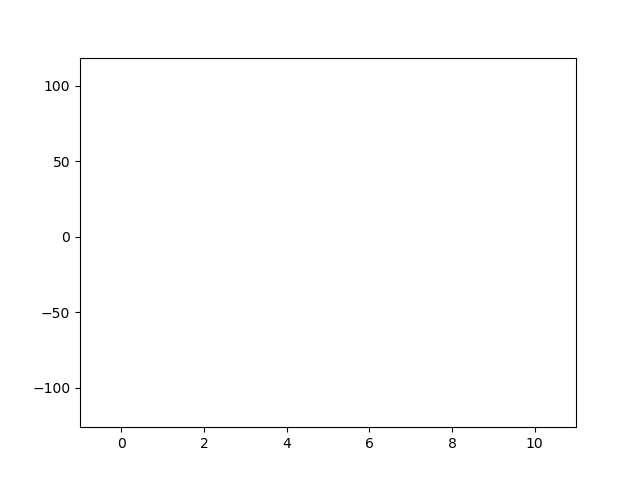

In [18]:
fig1 = plt.figure()
ax1 = plt.axes()
plt.axis([x_min-1, x_max+1, y_min-1, y_max+1])
line1, = ax1.plot([], [],'b')
FuncAnimation(fig1, at_frame1, frames=matrix, repeat=False, interval=30)

Для повторного воспроизведения анимации нужно запустить предыдующую ячейку кода снова

### B - параметрически заданная функция

$\color{Red}{Создание}$ $\color{Red}{анимации}$ построения графика параметрически заданной функции $x = x(t)$, $y = y(t)$ по значениям $t$, последовательно изменяющимся от $t_{min}$ до $t_{max}$ с шагом $step$. Выполнение задания для функции $x = arcsin (sit(t))$, $y = arccos(cos(t))$, где $t_{min} = 0$, $t_{max} = 10$, $step = 0.1$.

Определим две функции $x(t)$ и $y(t)$

In [19]:
def x2(t):
    return np.arcsin(np.sin(t))
def y2(t):
    return np.arccos(np.cos(t))


x2 = np.vectorize(lambda t: np.arcsin(np.sin(t)))
dx2 = np.vectorize(lambda t: (1/np.sqrt(1-np.sin(t)**2) * np.cos(t)) if np.sin(t)**2 != 1 else 1000**(-2))
y2 = np.vectorize(lambda t: np.arccos(np.cos(t)))
dy2 = np.vectorize(lambda t: (1/np.sqrt(1-np.cos(t)**2) * np.sin(t)) if np.cos(t)**2 != 1 else 1000**(-2))

Также зададим переменные:

In [20]:
t_min = 0; t_max = 10; step = 0.1

Создадим массив равномерно распределённых значений t и значения функций x и y для этих t:

In [21]:
t_array = np.arange(t_min, t_max, step)
x2_array = x2(t_array)
y2_array = y2(t_array)

Из двух массивов x_array и y_array создадим матрицу matrix координат точек графика функции . Матрица состоит из двух столбцов. Первый столбец матрицы
содержит $x$-координаты точек, второй столбец -- $y$-координаты точек

In [22]:
matrix2 = np.transpose([x2_array, y2_array])

Повторяем действия из предыдущего пункта:

(-2.5584073464102026, 2.5415926535897913, -1.0, 4.116814692820414)

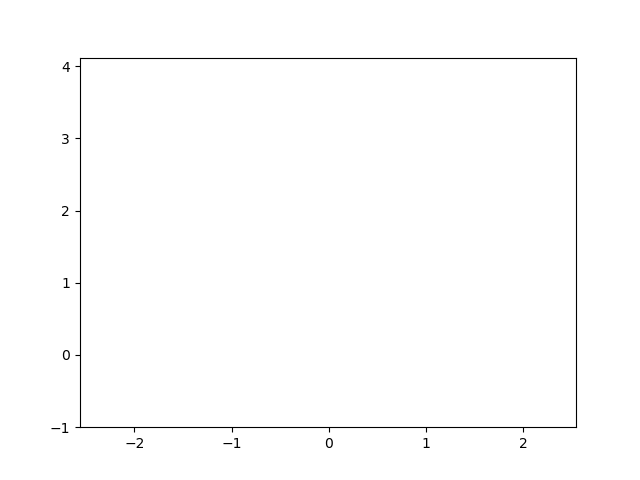

In [23]:
fig2 = plt.figure()
x_min, x_max = np.min(x2_array), np.max(x2_array)
y_min, y_max = np.min(y2_array), np.max(y2_array)
ax2 = plt.axes()
plt.axis([x_min-1, x_max+1, y_min-1, y_max+1])

In [24]:
line2, = ax2.plot([],[],'b')
print(type(line2))
line2.get_xdata(), line2.get_ydata()

<class 'matplotlib.lines.Line2D'>


(array([], dtype=float64), array([], dtype=float64))

In [25]:
def at_frame2(point):
    """добавляет к объекту line2 точку с координатами (point[0],point[1])
    
    Arguments :
    
    point : массив из двух элементов
    
    Returns : None
    """
    x_coord = list(line2.get_xdata())
    y_coord = list(line2.get_ydata())

    x_coord.append(point[0])
    y_coord.append(point[1])

    line2.set_data(x_coord, y_coord)

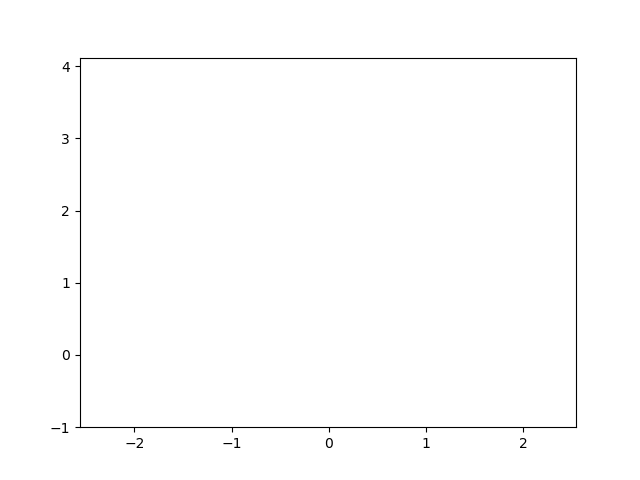

In [26]:
fig2 = plt.figure()
ax2 = plt.axes()
plt.axis([x_min-1, x_max+1, y_min-1, y_max+1])
line2, = ax2.plot([], [],'b')
FuncAnimation(fig2, at_frame2, frames=matrix2, repeat=False, interval=150)

## Движение точки по линии на плоскости

$\color{Red}{Создайте}$ $\color{Red}{анимацию}$ движения точки по графику функции $x = x(t)$, $y = y(t)$ по значениям $t$, последовательно изменяющихся от $t_{min}$ до $t_{max}$ с шагом $step$. Функция $x=x(t)$, $y=y(t)$ и значения переменных $t_{min}$, $t_{max}$, $step$ задаются такими же как и при выполнении предыдущего задания

### Реализация для явно заданной функции

Последовательно выполним следущие шаги с использованием функций из модуля
pyplot :
- с помощью функции figure создадим графическое окно, в котором в
дальнейшем будет отображаться анимация
- с помощью функции axes cоздадим графическую область и зададим для нее
пределы по осям с помощью функции axis
- с помощью функции plot создадим в графической области графический объект
типа Line2D синего цвета 'b' , координаты которого описывают аналитическую
функцию
- с помощью функции plot создадим в графической области графический объект
типа Line2D зеленого цвета с маркером в виде кружка 'go' , координаты
которого пока неизвестны

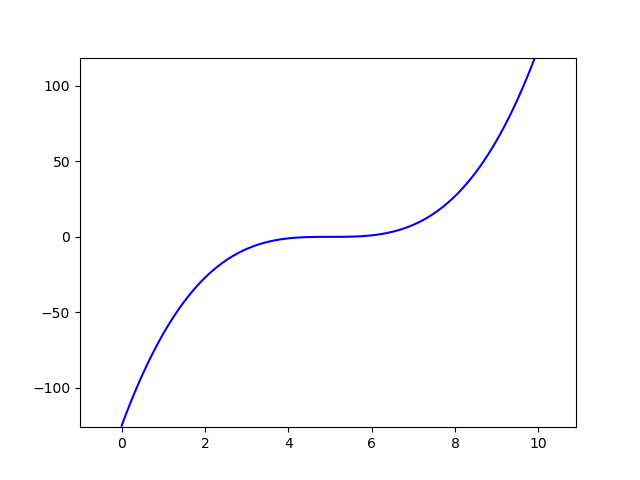

In [18]:
fig3 = plt.figure()
ax3 = plt.axes()
x_min, x_max = np.min(x_array), np.max(x_array)
y_min, y_max = np.min(y_array), np.max(y_array)
plt.axis([x_min-1, x_max+1, y_min-1, y_max+1])
line1, = ax3.plot(x_array, y_array,'b') # объект для графика функции
line2, = ax3.plot([], [],'go') # объект для точки

Определим пользовательскую функцию одного аргумента at_frame2 , которая будет вызываться в каждом кадре анимации.

Единственный аргумент функции at_frame2 является массивом из $x$ и $y$ координат
точки графика функции. Функция at_frame2 задает графический объект line2
единственной точкой с координатами $(x, y)$

In [19]:
def at_frame3(point):
    """задает объект line2 точкой с координатами (point[0],point[1])
    
     Arguments :

     point : массив из двух элементов

     Returns : None
     """
    # print('clever')
    line2.set_data([point[0]], [point[1]])

Полагаем аргумент init_func функции FunAnimation равным пользовательской функции init : init_func=init . Функция init будет вызываться перед началом анимации

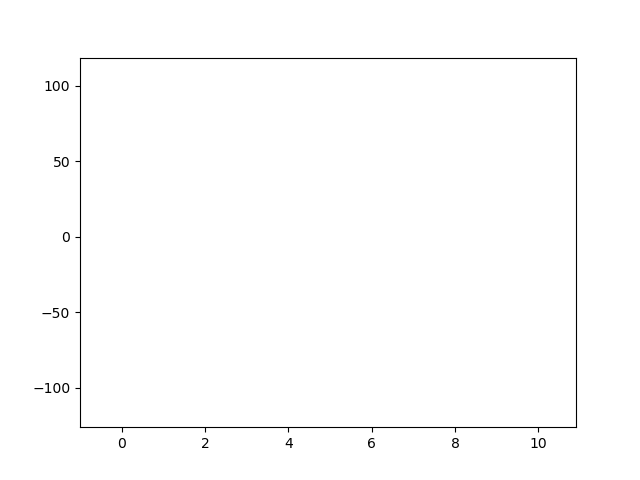

In [20]:
fig3 = plt.figure()
ax3 = plt.axes()
plt.axis([x_min-1, x_max+1, y_min-1, y_max+1])
def init():
    """создает начальное состояние графической области"""
    global line2 # переменная сделана глобальной, чтобы она могла изменяться внутри at_frame3

    line1, = ax3.plot(x_array, y_array,'b')
    line2, = ax3.plot([], [],'go')
    plt.legend(['$y(x) = (x-5)^3$','Мovable point'])
FuncAnimation(fig3, at_frame3, frames=matrix, init_func=init, repeat=False, interval=30)

### Реализация задания для функции заданной параметрически

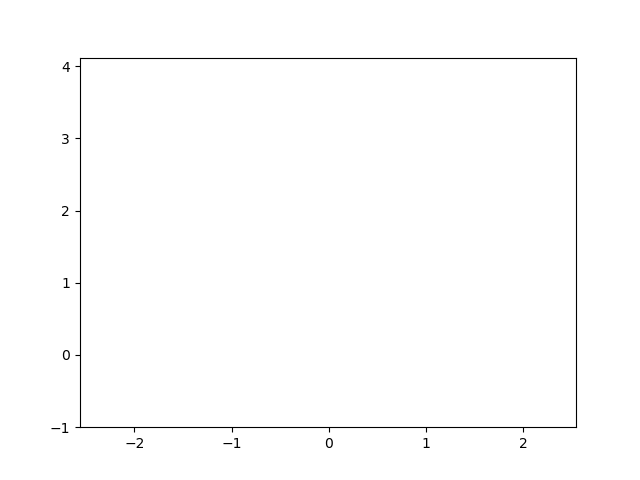

In [30]:
fig4 = plt.figure()
ax4 = plt.axes()

x_min, x_max = np.min(x2_array), np.max(x2_array)
y_min, y_max = np.min(y2_array), np.max(y2_array)

plt.axis([x_min-1, x_max+1, y_min-1, y_max+1])

def init():
    """создает начальное состояние графической области"""
    global line2 # переменная сделана глобальной, чтобы она могла изменяться внутри at_frame2

    line1, = ax4.plot(x2_array, y2_array,'b')
    line2, = ax4.plot([], [],'go')
    plt.legend(['$y(t) = arccos(cos(t)$\n$x(t) = arcsin(sin(t))$','Мovable point'])
FuncAnimation(fig4, at_frame3, frames=matrix2, init_func=init, repeat=False, interval=30)

## Движение секущей прямой к заданной линии на плоскости

Линия на плоскости задана графиком параметрической функции $x=x(t)$, $y=y(t)$ для $t\in[t_{min},t_{max}]$ из предыдущего задания. Точка $B$ движется последовательно по линии от конечной точки кривой с координатами $(x(t_{max}), y(t_{max}))$ к неподвижной точке $A$.

$\color{Red}{Создание}$ $\color{Red}{анимации}$ движения секущей прямой, проходящей через точки $A$ и $B$ до момента совпадения координат точек $A$ и $B$, когда секущая прямая становится касательной прямой к заданной линии в начальной точке $A$.

### Реализация задания для явно заданной функции

Перед началом анимации графическая область должна содержать следующие графические объекты:

- график заданной функции, которая определяет траекторию движения подвижной
точки $B$;
- неподвижную точку $A$;
- начальное положение подвижной точки $B$;
- секущую прямую, проходящую через точки $A$ и $B$;

Начальное состояние графической области реализуем с помощью пользовательской функции init.

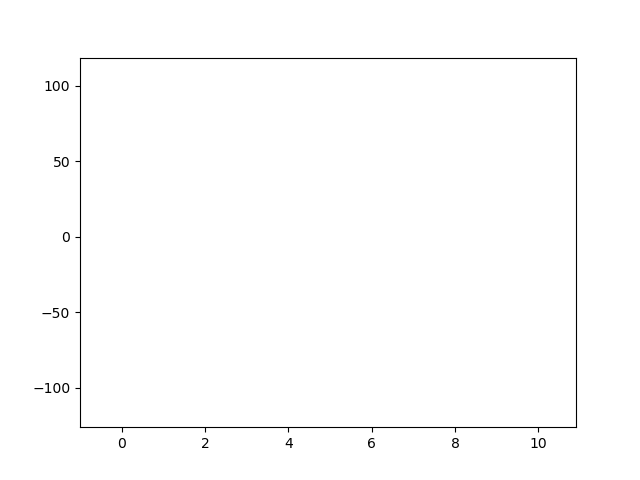

In [31]:
fig5 = plt.figure()
ax5 = plt.axes()
x_min, x_max = np.min(x_array), np.max(x_array)
y_min, y_max = np.min(y_array), np.max(y_array)
plt.axis([x_min-1, x_max+1, y_min-1, y_max+1])

def init():
    """cоздает начальное состояние графической области перед началом анимации и возвращает Noglobal point_B, secant_line # переменные сделаны глобальными, чтобы они были доступны для дальнейшего изменения в других функциях"""
    global point_B, secant_line, A
    
    curve, = ax5.plot(x_array, y_array,'b') # графический объект для исходной функции

    A = np.array([x_array[0], y_array[0]])
    point_A, = ax5.plot(A[0],A[1],'ro') # графический объект для неподвижной точки

    B = np.array([x_array[-2], y_array[-2]])
    point_B, = ax5.plot(B[0],B[1],'go') # графический объект для подвижной точки

    secant_p = np.array([A + (B - A)*t for t in np.array([-2, 2])]) # две точки секущей прямой, проходящей через secant_p = np.array(secant_p)
    secant_line, = ax5.plot(secant_p[:,0], secant_p[:,1],'g') # графический объект для секущей прямой
    plt.legend(['$y(x) = (x-5)^3$','Unmovable point A','Мovable point B','Secant line throughdef at_frame5(point)'])

def at_frame5(point):
    """заданные координаты записывает в переменную задающую подвижную точку B

    Arguments :

    point : массив из двух элементов, задающий координаты подвижной точки
    
    Returns : None
    """
    point_B.set_data([point[0]], [point[1]])
    B = point
    if A[0] != B[0] and A[1] != B[1]:
        secant_p = np.array([A + (B - A)*t for t in np.array([-10, 10])])
        secant_line.set_data(secant_p[:,0], secant_p[:,1])
    else:
        x0 = A[0]
        cas = lambda x: y(x0) + dy(x0) * (x - x0)
        secant_p = np.array([A + (np.array[x0+1, cas(x0 + 1)] - A)*t for t in np.array([-100,100])])
        secant_line.set_data(secant_p[:,0], secant_p[:,1])

matrix = np.transpose([x_array, y_array])

FuncAnimation(fig5, at_frame5, frames=matrix[::-1], init_func=init, repeat=False, interval = 50)

### Реализация для функции заданной параметрически

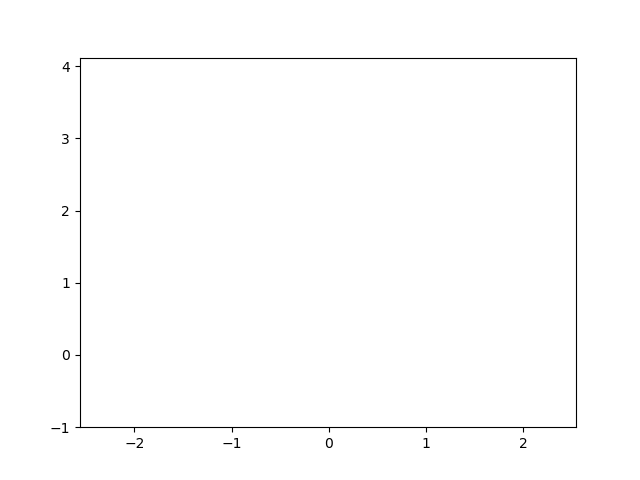

In [32]:
fig6 = plt.figure()
ax6 = plt.axes()
x_min, x_max = np.min(x2_array), np.max(x2_array)
y_min, y_max = np.min(y2_array), np.max(y2_array)
plt.axis([x_min-1, x_max+1, y_min-1, y_max+1])

def init():
    """cоздает начальное состояние графической области перед началом анимации и возвращает Noglobal point_A, secant_line, A # переменные сделаны глобальными, чтобы они были доступны для дальнейшего изменения в других функциях"""
    global point_A, secant_line, B
    
    curve, = ax6.plot(x2_array, y2_array,'b') # графический объект для исходной функции

    A = np.array([x2_array[-1], y2_array[-1]])
    point_A, = ax6.plot(A[0],A[1],'ro') # графический объект для неподвижной точки

    B = np.array([x2_array[0], y2_array[0]])
    point_B, = ax6.plot(B[0],B[1],'go') # графический объект для подвижной точки

    secant_p = np.array([B + (A - B)*t for t in np.array([-2, 2])]) # две точки секущей прямой, проходящей через secant_p = np.array(secant_p)
    secant_line, = ax6.plot(secant_p[:,0], secant_p[:,1],'g') # графический объект для секущей прямой
    plt.legend(['$x(t) = arcsin(sin(t))$\n$y(t) = arccos(cos(t))$','Movable point A','Unmovable point B','Secant line throughdef at_frame4(point)'])

def at_frame6(point):
    """заданные координаты записывает в переменную задающую подвижную точку A

    Arguments :

    point : массив из двух элементов, задающий координаты подвижной точки
    
    Returns : None
    """
    A = point
    point_A.set_data([point[0]], [point[1]])
    if B[0] == A[0] and B[1] == A[1]:
        vec = np.array([1, dy2(t_min) / dx2(t_min)])
        secant_p = np.array([A + vec*t for t in np.array([-100,100])])
        secant_line.set_data(secant_p[:,0], secant_p[:,1])
    else:
        secant_p = np.array([B + (A - B)*t for t in np.array([-100, 100])])
        secant_line.set_data(secant_p[:,0], secant_p[:,1])


FuncAnimation(fig6, at_frame6, frames=matrix2[::-1], init_func=init, repeat=False, interval=500)